# Statistics in Python

## Import packages

In [76]:
import pandas
import numpy as np
from pandas import plotting
from scipy import stats
from statsmodels.formula.api import ols
import seaborn
from matplotlib import pyplot as plt

## Import data

In [6]:
# Read in a CSV file using pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [7]:
# Create an array using numpy
t = np.linspace(-6,6,20)
sin_t = np.sin(t)
cos_t = np.cos(t)
pandas.DataFrame({'t' : t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Manipulating data

In [8]:
# data is a pandas.DataFrame that resembles R's Dataframe
data.shape
data.columns
print(data['Gender'])
# Simpler selection
data[data['Gender'] == 'Female']['VIQ'].mean()

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


109.45

In [9]:
#Quick view on large df
pandas.DataFrame.describe(data)

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [10]:
# Use groupby to split a df on values of a categorical variable
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

# groupby_gender is an object which exposes operations on the resulting group of dataframes
groupby_gender.mean()

('Female', 109.45)
('Male', 115.25)


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting data

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

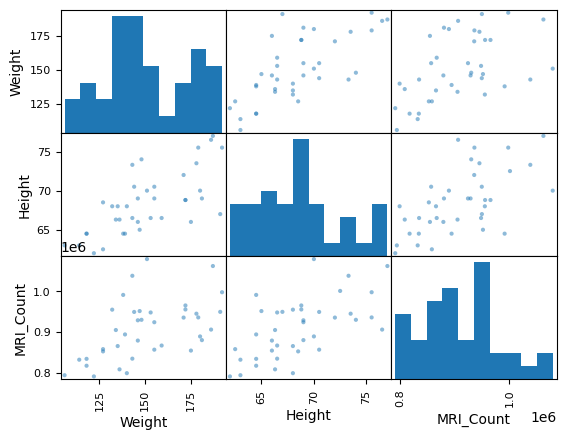

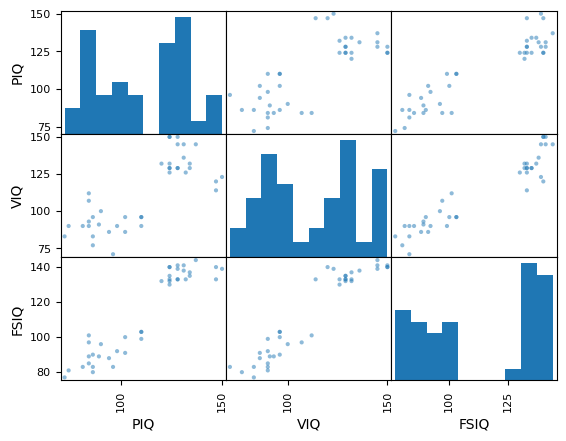

In [11]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plotting.scatter_matrix(data[['PIQ', 'VIQ','FSIQ']])

## Hypothesis testing: comparing two groups

In [18]:
# Student's t-test
# 1-sample t-test
stats.ttest_1samp(data['VIQ'], 0)  

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727975e-28, df=39)

In [17]:
# 2-sample t-test
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq,male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

In [23]:
# Paired tests: repeated measurements on the same individuals
# Problem - forgets that there are links between these two observations - measured on same individuals
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [ ]:
 # repeated measures
stats.ttest_rel(data['FSIQ'], data['PIQ'])

In [25]:
# this is equivalent to a 1-sample test on the difference
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [27]:
# t-tests assume gaussian errors; we can use a Wilcoxon signed-rank test.
# relaxes assumption
stats.wilcoxon(data['FSIQ'], data['PIQ'])

/Users/anjalibyappanahalli/miniconda3/envs/example-environment/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

## Linear models, multiple factors, and analysis of variance

In [32]:
# generate simulated data according to the model
x = np.linspace(-5,5,20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# create a data frame containing all the relevant variables
data = pandas.DataFrame({'x':x, 'y':y})
# specify an OLS model and fit it:
model = ols('y ~ x', data).fit()
# inspect various statistics derived from the fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        11:23:34   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [33]:
# categorical variables: comparing groups or multiple categories
data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')

In [37]:
# comparison between IQ
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 13 Jul 2023   Prob (F-statistic):              0.445
Time:                        11:31:43   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [41]:
### Links t-test
data_fisq = pandas.DataFrame({'iq':data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)
model = ols('iq ~ type', data_long).fit()
print(model.summary())

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 13 Jul 2023   Prob (F-statistic):              0.643
Time:                        11:41:49   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  c

## Multiple regressions: including multiple factors

In [55]:
# import csv
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.58e-20
Time:                        11:59:58   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [56]:
print(model.f_test([0,1,-1,0]))

<F test: F=3.245335346574309, p=0.07369058781700516, df_denom=146, df_num=1>


## More visualization: seaborn for statistical exploration

In [ ]:
data = pandas.read_csv('wages.csv', sep=',')
print(data)

/Users/anjalibyappanahalli/miniconda3/envs/example-environment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


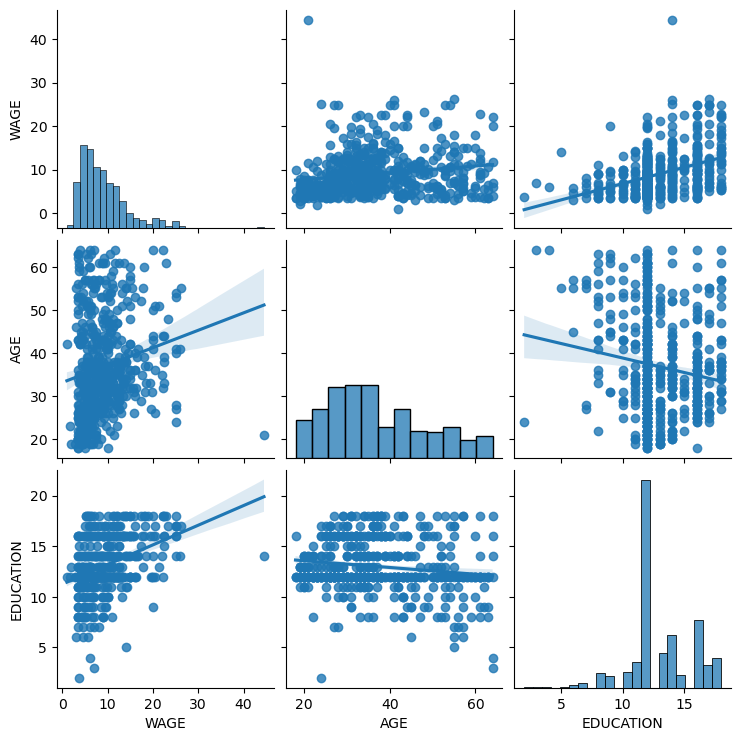

In [105]:
# data is not provided; therefore, I will use the pevious iris data set
# could not plot name beacuse it is categorical
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind = 'reg')

/Users/anjalibyappanahalli/miniconda3/envs/example-environment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


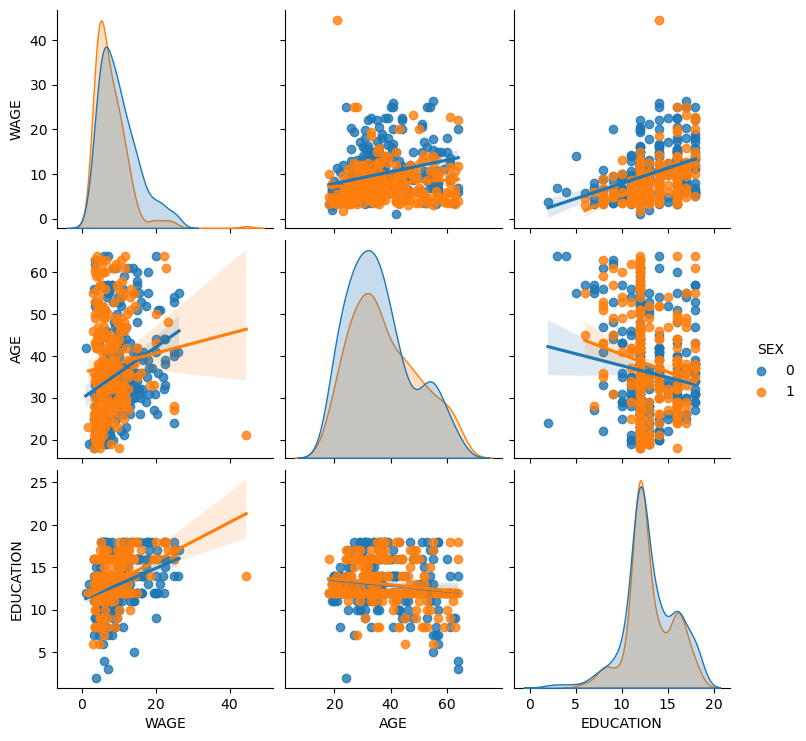

In [106]:
#categorical variables can be plotted as the hue:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind = 'reg', hue='SEX')

## lmplot: plotting a univariate regression

/Users/anjalibyappanahalli/miniconda3/envs/example-environment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


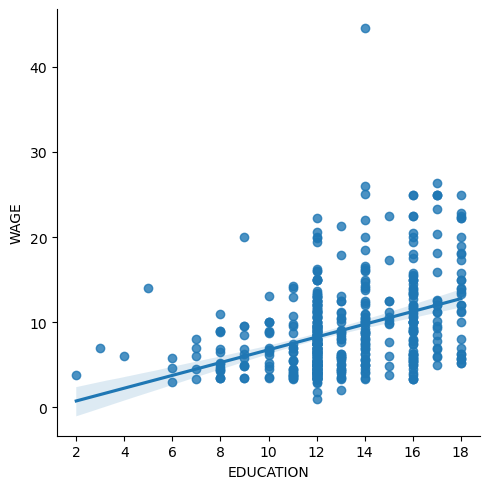

In [107]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

## Testing for interactions

In [108]:
result = ols(formula = 'WAGE ~ EDUCATION + GENDER + EDUCATION * GENDER', data=data).fit()


PatsyError: Error evaluating factor: NameError: name 'GENDER' is not defined
    WAGE ~ EDUCATION + GENDER + EDUCATION * GENDER
                       ^^^^^^